In [1]:
#%load_ext autoreload
#%autoreload 2

import os
import numpy as np 
from multiprocessing import Pool
import time 
import random
import IPython.display as ipd
import pyaudio
import librosa
import librosa.display
from matplotlib import pyplot as plt
import sys
from pathlib import Path

try:
    sys.path.append(str(Path().cwd().parent.parent))
except IndexError:
    pass

#import utils.audio as a
#import utils.plots as plots
import utils as utils

ModuleNotFoundError: No module named 'pyaudio'

In [2]:
# load (fe)male audio sequences without alpha, beta 
female_audios = np.load("female_audios/female_audios_500.npy")
male_audios = np.load("male_audios/male_audios_500.npy")

N = 1000
ratio = 0.5
n_male = int(ratio * N)
n_female = N - n_male
SR = 22050 

In [3]:
# get male indices and audio signals
male_idx = np.random.choice(male_audios.shape[0], n_male)
males = [male_audios[i] for i in male_idx]

# get female indices and audio signals
female_idx = np.random.choice(female_audios.shape[0], n_female)
females = [female_audios[i] for i in female_idx]

# concatenate both lists and shuffle
mixed_audio = np.array(random.sample(males+females, N))

In [4]:
# read data
data = utils.misc.slidingWindow(mixed_audio, int(SR*1), int(SR*1))

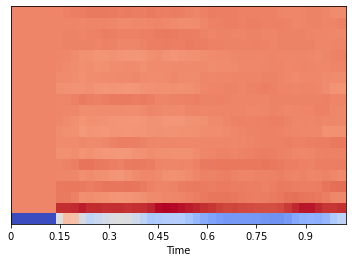

In [5]:
# librosa
inp = data[np.random.randint(1000), np.random.randint(10)]
mfccs = librosa.feature.mfcc(y=inp, sr=SR, n_mfcc=20) #has quite a bunch of parameters
librosa.display.specshow(mfccs, sr=SR, x_axis='time')
ipd.Audio(inp, rate=SR)

In [6]:
num_points = 1000
num_feats = 6
num_chunks = 10
X = np.zeros((num_points*num_chunks, 44*num_feats))
for i in range(num_points):
    for j in range(num_chunks):
        X[i*num_chunks+j, :] = librosa.feature.mfcc(y=data[i, j], sr=SR, n_mfcc=num_feats).flatten()

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

new_X = StandardScaler().fit_transform(X)

#new_X = X

pca = PCA(n_components=20)
pca_X = pca.fit_transform(new_X)

#pca_X = new_X

(array([ 859.,    0., 2004.,    0., 1864.,    0., 2598.,    0., 2192.,
         483.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

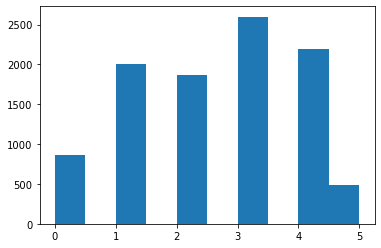

In [8]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6).fit(pca_X)
labels = gmm.predict(pca_X)
plt.hist(labels)

In [25]:
target = 3
idx = np.where(labels==target)[0][0]
print(labels[idx])
i = idx // num_chunks
j = idx % num_chunks
ipd.Audio(data[i, j], rate=SR)

3


In [26]:
idx = np.where(labels==target)[0][1]
print(labels[idx])
i = idx // num_chunks
j = idx % num_chunks
ipd.Audio(data[i, j], rate=SR)

3


In [27]:
idx = np.where(labels==target)[0][2]
print(labels[idx])
i = idx // num_chunks
j = idx % num_chunks
ipd.Audio(data[i, j], rate=SR)

3


In [28]:
idx = np.where(labels==target)[0][3]
print(labels[idx])
i = idx // num_chunks
j = idx % num_chunks
ipd.Audio(data[i, j], rate=SR)

3


In [29]:
idx = np.where(labels==target)[0][4]
print(labels[idx])
i = idx // num_chunks
j = idx % num_chunks
ipd.Audio(data[i, j], rate=SR)

3


/Users/jayant/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/lib/display.py:135: RuntimeWarning: invalid value encountered in true_divide
  scaled = np.int16(data/np.max(np.abs(data))*32767).tolist()


In [14]:
%matplotlib widget
plot_X = PCA(n_components=3).fit_transform(pca_X)
colors = ['r', 'b', 'g', 'm', 'k', 'c']
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(111, projection='3d')
for i in range(6):
    ax.scatter(plot_X[labels==i, 0], plot_X[labels==i, 1], plot_X[labels==i, 2], c=colors[i], s=.1);
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …